Some basic Data analysis and visualization of Spotify track records. Maybe run some models and then choose said model to generate some sort of preferred track recommendation based on given parameters. Of course the code for recommendation will be in an another file. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
spotify_data = pd.read_csv("SpotifyData/dataset.csv")
print(spotify_data.columns)
spotify_data.describe()

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [3]:
spotify_data = spotify_data.drop("Unnamed: 0", axis= 1)

In [4]:
unique_column_values = {}
for column_name in spotify_data.columns:
   unique_column_values[column_name] = spotify_data[column_name].nunique()

print(list(unique_column_values.keys()))
print(list(unique_column_values.values()))
print(len(spotify_data.columns))

['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
[89741, 31437, 46589, 73608, 101, 50697, 2, 1174, 2083, 12, 19480, 2, 1489, 5061, 5346, 1722, 1790, 45653, 5, 114]
20


[Text(0.5, 0, 'time signature'), Text(0, 0.5, '')]

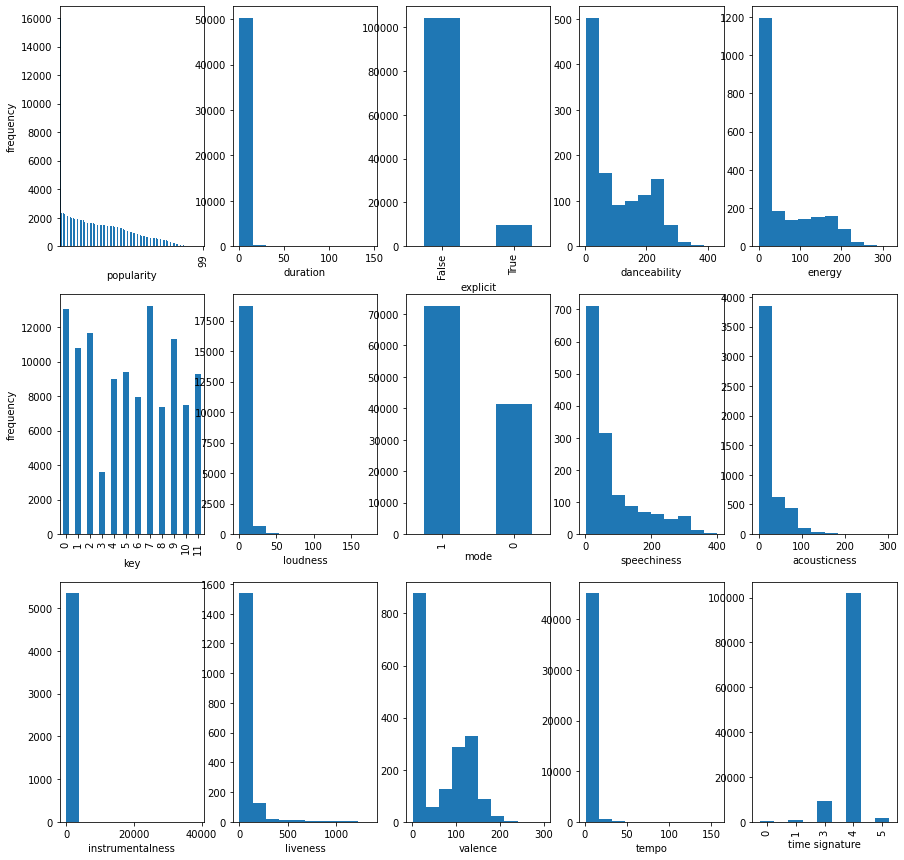

In [5]:
fig, axes = plt.subplots(nrows= 3, ncols= 5, figsize = (15,15))
spotify_data["popularity"].sort_values().sort_index().value_counts().plot(kind = "bar", ax=axes[0,0])
axes[0,0].set_xticks([spotify_data.popularity.max()])
axes[0,0].set(xlabel = "popularity", ylabel = "frequency")
spotify_data["duration_ms"].value_counts().plot(kind = "hist", ax=axes[0,1])
axes[0,1].set(xlabel = "duration", ylabel = "")
spotify_data["explicit"].value_counts().plot(kind = "bar", ax=axes[0,2])
axes[0,2].set(xlabel = "explicit", ylabel = "")
spotify_data["danceability"].value_counts().plot(kind = "hist", ax=axes[0,3])
axes[0,3].set(xlabel = "danceability", ylabel = "")
spotify_data["energy"].value_counts().plot(kind = "hist", ax=axes[0,4])
axes[0,4].set(xlabel = "energy", ylabel = "")
spotify_data["key"].value_counts().sort_index().plot(kind = "bar", ax=axes[1,0])
axes[1,0].set(xlabel = "key", ylabel = "frequency")
spotify_data["loudness"].value_counts().plot(kind = "hist", ax=axes[1,1])
axes[1,1].set(xlabel = "loudness", ylabel = "")
spotify_data["mode"].value_counts().plot(kind = "bar", ax=axes[1,2])
axes[1,2].set(xlabel = "mode", ylabel = "")
spotify_data["speechiness"].value_counts().plot(kind = "hist", ax=axes[1,3])
axes[1,3].set(xlabel = "speechiness", ylabel = "")
spotify_data["acousticness"].value_counts().plot(kind = "hist", ax=axes[1,4])
axes[1,4].set(xlabel = "acousticness", ylabel = "")
spotify_data["instrumentalness"].value_counts().plot(kind = "hist", ax=axes[2,0])
axes[2,0].set(xlabel = "instrumentalness", ylabel = "")
spotify_data["liveness"].value_counts().plot(kind = "hist", ax=axes[2,1])
axes[2,1].set(xlabel = "liveness", ylabel = "")
spotify_data["valence"].value_counts().plot(kind = "hist", ax=axes[2,2])
axes[2,2].set(xlabel = "valence", ylabel = "")
spotify_data["tempo"].value_counts().plot(kind = "hist", ax=axes[2,3])
axes[2,3].set(xlabel = "tempo", ylabel = "")
spotify_data["time_signature"].value_counts().sort_index().plot(kind = "bar", ax=axes[2,4])
axes[2,4].set(xlabel = "time signature", ylabel = "")

<Axes: >

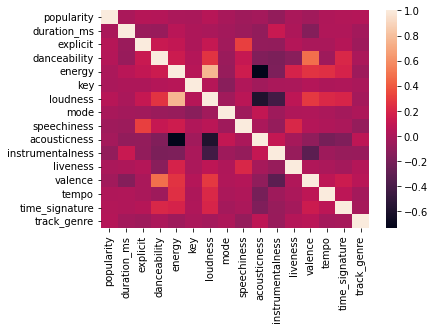

In [6]:
from sklearn.preprocessing import OrdinalEncoder

spotify_copy = spotify_data.copy()

ord_enc = OrdinalEncoder()
spotify_copy["track_genre"] = ord_enc.fit_transform(spotify_copy[["track_genre"]])

spotify_features = spotify_copy.columns[4:20]
sns.heatmap(spotify_copy[spotify_features].corr(), xticklabels = spotify_features, yticklabels = spotify_features)

In [7]:
def get_correlations(df):
    labels_to_drop = set()
    cols = list(df.columns)
    for i in range(len(cols)):
        for j in range(i + 1):
            labels_to_drop.add((cols[i], cols[j]))
    
    unstacked_corr = df.corr().unstack()
    dropped_duplicates = unstacked_corr.drop(labels_to_drop)
    ordered_spotify = dropped_duplicates.sort_values(ascending = False)
    return ordered_spotify

In [8]:
necessary_spotify = spotify_copy[spotify_features]
correlated = get_correlations(necessary_spotify)
print(correlated[0:13])
'''unstacked_corr = spotify_copy[spotify_features].corr().unstack()
ordered_spotify = unstacked_corr.sort_values(ascending = False)
print(ordered_spotify[0:3])'''

energy        loudness          0.761690
danceability  valence           0.477341
explicit      speechiness       0.307952
loudness      valence           0.279848
danceability  loudness          0.259077
energy        valence           0.258934
              tempo             0.247851
loudness      tempo             0.212446
danceability  time_signature    0.207218
speechiness   liveness          0.205219
loudness      time_signature    0.191992
energy        time_signature    0.187126
              liveness          0.184796
dtype: float64


'unstacked_corr = spotify_copy[spotify_features].corr().unstack()\nordered_spotify = unstacked_corr.sort_values(ascending = False)\nprint(ordered_spotify[0:3])'

In [9]:
track_genre_corr = spotify_copy[spotify_features].corr()["track_genre"]
ordered_track_genre = track_genre_corr.sort_values(ascending = False)
print(ordered_track_genre)

track_genre         1.000000
acousticness        0.077217
valence             0.053307
liveness            0.033565
popularity          0.032692
mode                0.005242
danceability        0.003569
key                -0.005508
time_signature     -0.021005
tempo              -0.025926
loudness           -0.027233
duration_ms        -0.032826
explicit           -0.054828
energy             -0.056175
instrumentalness   -0.070664
speechiness        -0.085145
Name: track_genre, dtype: float64


In [10]:
from sklearn.preprocessing import StandardScaler

normed_spotify_data = spotify_copy.copy()

for column_name in normed_spotify_data.columns[4:20]:
    sc = StandardScaler()
    reshaped_column = normed_spotify_data[column_name].values.reshape(-1,1)
    normed_spotify_data[column_name] = pd.DataFrame(sc.fit_transform(reshaped_column))

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


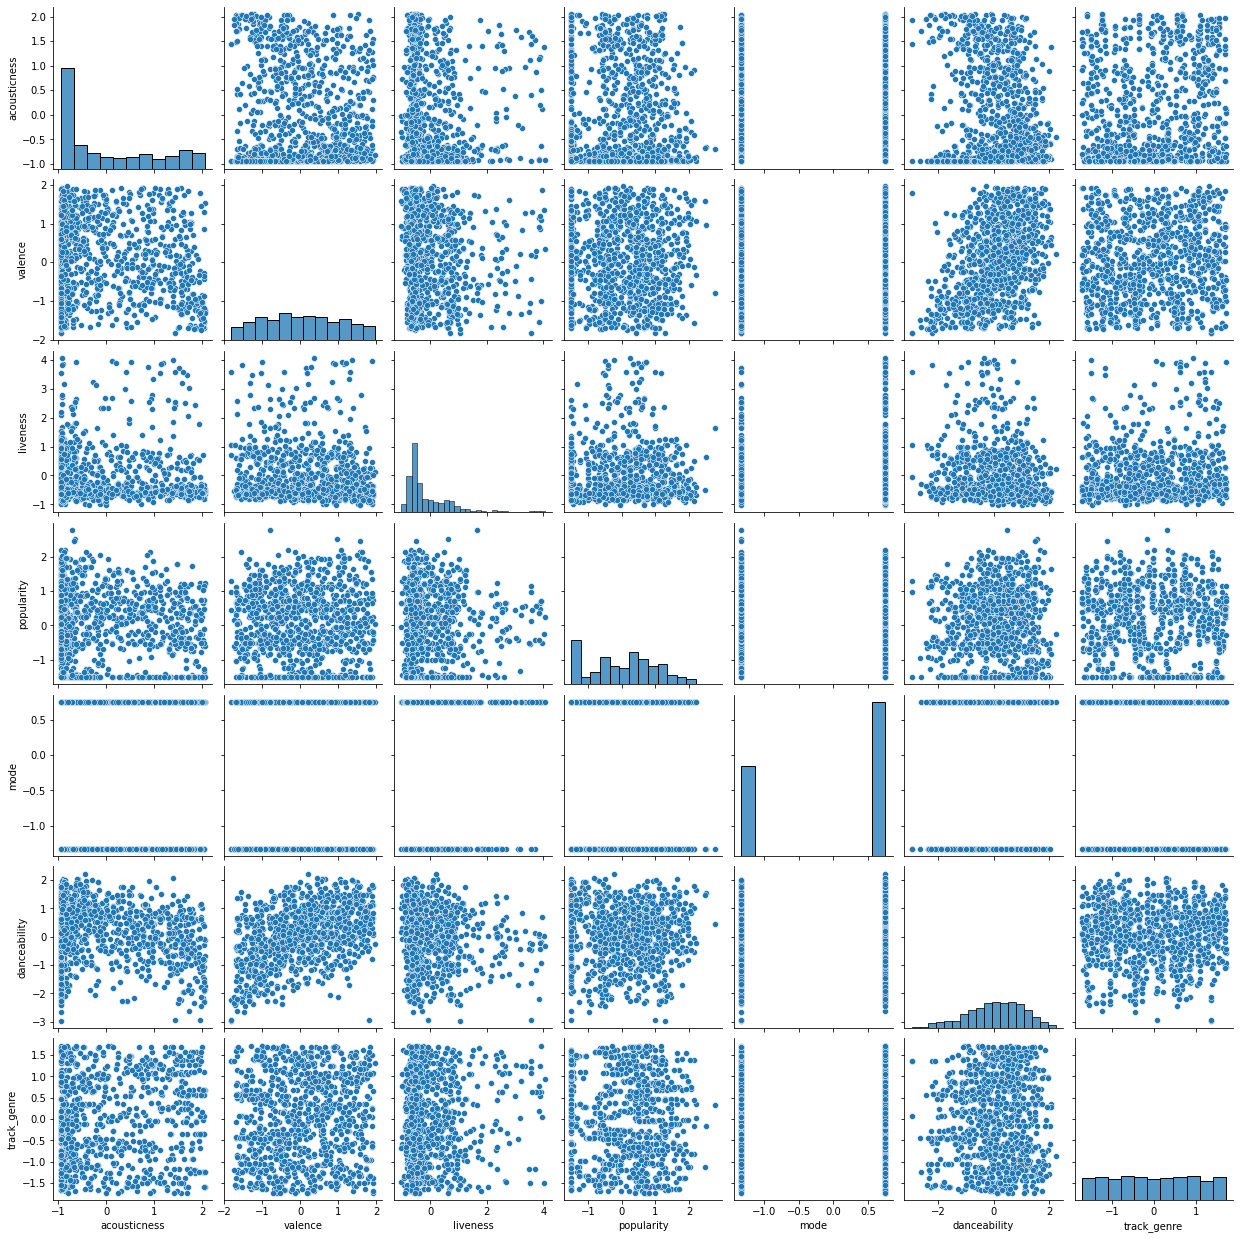

In [11]:
pairplot_features = ["acousticness", "valence", "liveness", "popularity", "mode", "danceability", "track_genre"]
sns.pairplot(normed_spotify_data[pairplot_features].sample(1000))

In [12]:
from sklearn.neighbors import KNeighborsClassifier as knn

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [13]:
def knn_score(features, target_feature, df, max_n):

    X = df[features]
    y = df[target]

    train_X, val_X, train_y, val_y = train_test_split(X,y,train_size = 0.2)

    neighbors_score = {}

    for i in range(1, max_n + 1):
        df_knn = knn(n_neighbors = i, weights = "uniform")
        df_knn.fit(train_X, train_y)
        pred = df_knn.predict(val_X)

        neighbors_score[i] = accuracy_score(val_y, pred)

    return neighbors_score


In [14]:
features = ["acousticness", "valence", "liveness", "popularity", "mode", "danceability"]
target = "track_genre"

print(knn_score(features, target, spotify_copy, 11))

{1: 0.13474780701754385, 2: 0.1261513157894737, 3: 0.13076754385964912, 4: 0.13396929824561404, 5: 0.13882675438596492, 6: 0.1426425438596491, 7: 0.14529605263157894, 8: 0.14645833333333333, 9: 0.14854166666666666, 10: 0.14894736842105263, 11: 0.14957236842105262}


In [15]:
features = ["acousticness", "valence", "liveness", "popularity", "danceability", "track_genre"]
target = "mode"

print(knn_score(features, target, spotify_copy, 11))

{1: 0.5886622807017544, 2: 0.5374342105263158, 3: 0.6029714912280701, 4: 0.5727192982456141, 5: 0.6126315789473684, 6: 0.5932017543859649, 7: 0.6181578947368421, 8: 0.6028837719298246, 9: 0.6218201754385965, 10: 0.6102631578947368, 11: 0.6245504385964912}


In [16]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [17]:
def get_labels(df, features, target, max_n_clusters):
    
    X = df[features]
    y = df[target]

    train_X, val_X, train_y, val_y = train_test_split(X,y, train_size = 0.2)

    models = {}
    scores = {}
    
    for i in range(2, max_n_clusters + 1):

        kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto").fit(train_X)
        models[i] = kmeans
        scores[i] = silhouette_score(train_X, kmeans.labels_, metric = "euclidean")
    
    models_scores = {"models" : models, "scores" : scores}
    
    return models_scores



In [18]:
features = ["acousticness", "valence", "popularity", "danceability", "track_genre"]
target = "liveness"

print(get_labels(normed_spotify_data, features, target, 8).get("scores"))

{2: 0.19130781681991035, 3: 0.19497713353052656, 4: 0.1934986726564788, 5: 0.19442887460436, 6: 0.19576934140041918, 7: 0.1884269365183867, 8: 0.19908429112005674}


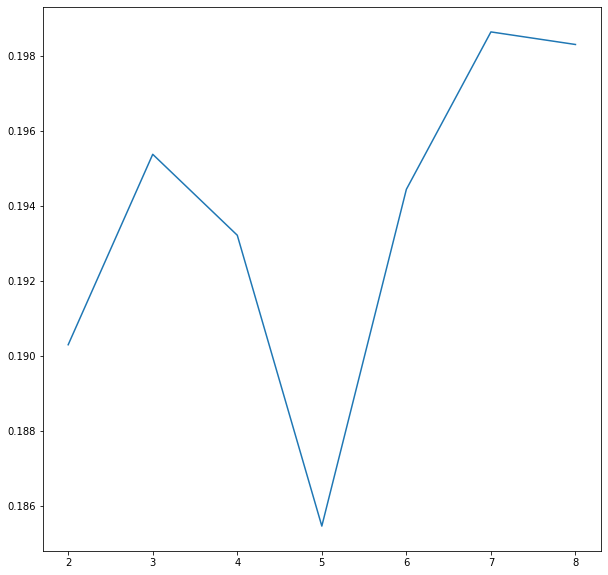

In [19]:
scores = list(get_labels(normed_spotify_data, features, target, 8).get("scores").values())
k_values = list(get_labels(normed_spotify_data, features, target, 8).get("scores").keys())
plt.figure(figsize = (10,10))
plt.plot(k_values, scores)
plt.show()